<a href="https://colab.research.google.com/github/kruthi03/wind-speed/blob/Stats%26ML/100001319_Kruthika_P_Day_1_final_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
# Updated URL to reflect the current location of the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
df = pd.read_excel(url) # Use read_excel since the file is now an xlsx file

# Check the first few rows of the dataset
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [ ]:
print(df.describe())

# Additional analysis for individual columns if needed
# Mean of Quantity
mean_quantity = df['Quantity'].mean()
# Median of Quantity
median_quantity = df['Quantity'].median()
# Standard deviation of Quantity
std_quantity = df['Quantity'].std()

print(f"Mean Quantity: {mean_quantity}")
print(f"Median Quantity: {median_quantity}")
print(f"Standard Deviation of Quantity: {std_quantity}")

            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  
Mean Quantity: 9.55224954743324
Median Quantity: 3.0
Standard Deviation of Quantity: 218.08115784986612


In [ ]:
# Remove rows with missing values
df_clean = df.dropna()

# Handle negative quantities (they might represent returns)
df_clean = df_clean[df_clean['Quantity'] > 0]

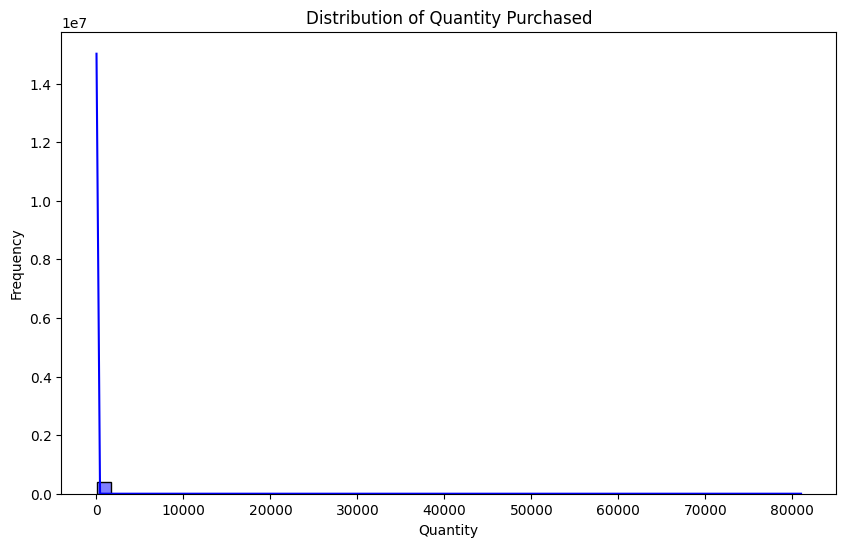

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of Quantity
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Quantity'], bins=50, kde=True, color='blue')
plt.title('Distribution of Quantity Purchased')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

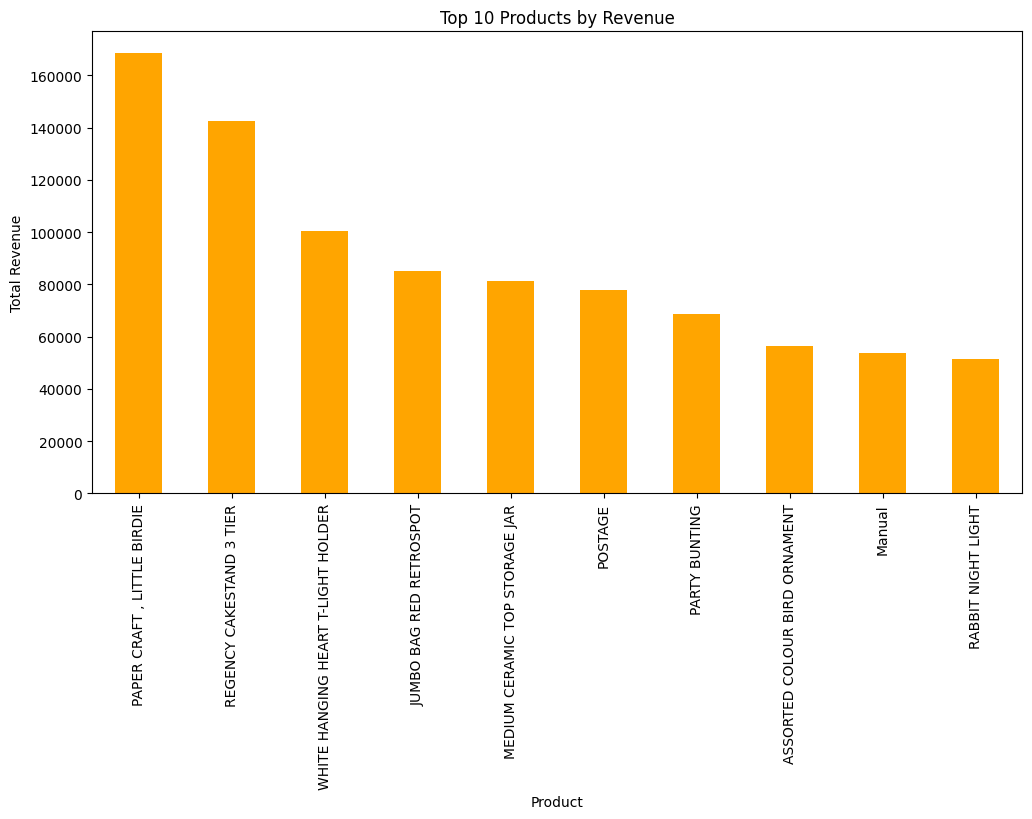

In [ ]:
# Calculate revenue for each transaction
df_clean['Revenue'] = df_clean['UnitPrice'] * df_clean['Quantity']

# Group by 'Description' and sum the revenue, then get the top 10
top_products = df_clean.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 products by revenue
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='orange')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.show()


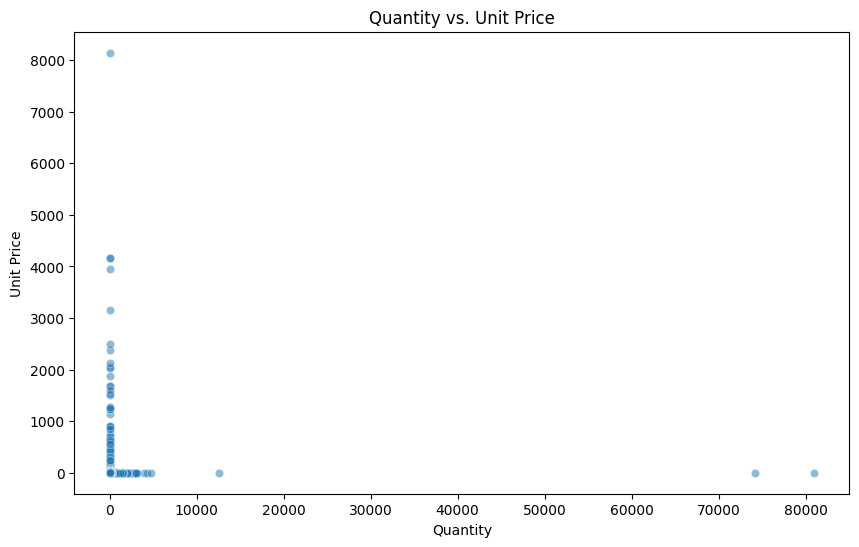

In [ ]:
# Scatter plot of Quantity vs UnitPrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=df_clean, alpha=0.5)
plt.title('Quantity vs. Unit Price')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()
